# Store Dataset

This dataset is from an Australian Superstore. We have details of around 150 stores from its varied locations in Australia. Our job is to see which factors does the sale depend on. We will also find out which stores are more profitable and so on

**Step 1: Setting up the work environment**

We are going to download the necessary packages for our work. We are going to view the dataset and check the datatypes.

In [124]:
#installing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import os
from collections import Counter
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
from scipy.stats import ttest_ind
%matplotlib inline
from scipy import stats
from sklearn.metrics import classification_report
from datetime import datetime
from datetime import date
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing as preproc
from sklearn import metrics
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#getting the dataset
store= pd.read_excel('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Datasets\\StoresData.xlsx') 
store.head()

,Store No.,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),State,State (Num),Age (Yrs),GrossProfit,...,Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel,HomeDel (Num),Basket:2013,Basket:2014
0,1,12.5,2.3,60,Mall,2,NSW,1,10,0.712,...,0,33,12,2,38,46,Del:No,0,171,178
1,2,14.5,2.7,69,Mall,2,Vic,2,8,0.091,...,0,33,16,1,38,73,Del:No,0,168,178
2,3,19.0,3.1,79,Country,3,Vic,2,7,1.075,...,0,30,9,2,39,64,Del:No,0,180,188
3,4,18.2,2.6,66,Mall,2,Qld,3,7,1.372,...,0,29,9,2,38,66,Del:Yes,1,173,180
4,5,7.6,2.0,51,Strip,1,Qld,3,15,2.148,...,0,36,4,3,40,29,Del:No,0,166,171


In [3]:
#seeing the dataset
store.shape

(150, 26)

In [4]:
#seeing datatypes
store.dtypes

Store No.          int64
Sales $m         float64
Wages $m         float64
No. Staff          int64
Location          object
Loc'n (Num)        int64
State             object
State (Num)        int64
Age (Yrs)          int64
GrossProfit      float64
Adv.$'000          int64
Competitors        int64
HrsTrading         int64
Sundays           object
Sundays (Num)      int64
Mng-Sex           object
Mng-Sex (Num)      int64
Mng-Age            int64
Mng-Exp            int64
Mng-Train          int64
Union%             int64
Car Spaces         int64
HomeDel           object
HomeDel (Num)      int64
Basket:2013        int64
Basket:2014        int64
dtype: object

In [5]:
#making typecast
def Typecasting(data):
    try:
        print(data.columns)
        typecast=data.astype(eval)
    except:
       typecast=data 
    return typecast

In [6]:
#typecasting the dataset
Typecasting(store)

Index(['Store No.', 'Sales $m', 'Wages $m', 'No. Staff', 'Location',
       'Loc'n (Num)', 'State', 'State (Num)', 'Age (Yrs)', 'GrossProfit',
       'Adv.$'000', 'Competitors', 'HrsTrading', 'Sundays', 'Sundays (Num)',
       'Mng-Sex', 'Mng-Sex (Num)', 'Mng-Age', 'Mng-Exp', 'Mng-Train', 'Union%',
       'Car Spaces', 'HomeDel', 'HomeDel (Num)', 'Basket:2013', 'Basket:2014'],
      dtype='object')


,Store No.,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),State,State (Num),Age (Yrs),GrossProfit,...,Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel,HomeDel (Num),Basket:2013,Basket:2014
0,1,12.5,2.3,60,Mall,2,NSW,1,10,0.712,...,0,33,12,2,38,46,Del:No,0,171,178
1,2,14.5,2.7,69,Mall,2,Vic,2,8,0.091,...,0,33,16,1,38,73,Del:No,0,168,178
2,3,19.0,3.1,79,Country,3,Vic,2,7,1.075,...,0,30,9,2,39,64,Del:No,0,180,188
3,4,18.2,2.6,66,Mall,2,Qld,3,7,1.372,...,0,29,9,2,38,66,Del:Yes,1,173,180
4,5,7.6,2.0,51,Strip,1,Qld,3,15,2.148,...,0,36,4,3,40,29,Del:No,0,166,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,14.1,3.3,88,Strip,1,SA,4,5,0.504,...,1,42,9,3,35,63,Del:No,0,163,172
146,147,8.1,1.7,58,Country,3,NSW,1,19,0.447,...,0,43,12,3,42,35,Del:No,0,178,186
147,148,13.6,2.9,66,Strip,1,WA,5,17,2.620,...,0,39,8,3,45,48,Del:No,0,166,172
148,149,10.0,2.0,55,Mall,2,WA,5,8,1.168,...,0,52,13,3,40,34,Del:No,0,174,182


**Step 2: Data cleaning**

In this step, we are going to clean our dataset. We are going to look for null values and replace them with mean and mode. 
We are going to modify some variables if it is necessary and change datatypes for better analysis. We will also remove outliers from the dataset.  Outliers hamper the machine learning algorithms and hence they have to be removed.

In [7]:
def Typecasting():
    data=store
    print(data[0])
    try:
        print(data.columns)
        typecast=data.astype(eval)
    except:
       typecast=data 
    return typecast

In [8]:
#dropping useless columns
store=store.drop(['HomeDel','Sundays','Mng-Sex'],axis=1)
store

,Store No.,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),State,State (Num),Age (Yrs),GrossProfit,...,Sundays (Num),Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),Basket:2013,Basket:2014
0,1,12.5,2.3,60,Mall,2,NSW,1,10,0.712,...,0,0,33,12,2,38,46,0,171,178
1,2,14.5,2.7,69,Mall,2,Vic,2,8,0.091,...,0,0,33,16,1,38,73,0,168,178
2,3,19.0,3.1,79,Country,3,Vic,2,7,1.075,...,1,0,30,9,2,39,64,0,180,188
3,4,18.2,2.6,66,Mall,2,Qld,3,7,1.372,...,1,0,29,9,2,38,66,1,173,180
4,5,7.6,2.0,51,Strip,1,Qld,3,15,2.148,...,1,0,36,4,3,40,29,0,166,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,14.1,3.3,88,Strip,1,SA,4,5,0.504,...,1,1,42,9,3,35,63,0,163,172
146,147,8.1,1.7,58,Country,3,NSW,1,19,0.447,...,0,0,43,12,3,42,35,0,178,186
147,148,13.6,2.9,66,Strip,1,WA,5,17,2.620,...,0,0,39,8,3,45,48,0,166,172
148,149,10.0,2.0,55,Mall,2,WA,5,8,1.168,...,0,0,52,13,3,40,34,0,174,182


In [9]:
#categorical variables
cat= ['Location','State']

In [10]:
#getting non categorical variables
non_cat=[]
for x in store.columns:
    if x in cat:
        pass
    else:
        non_cat.append(x)
print(non_cat)

['Store No.', 'Sales $m', 'Wages $m', 'No. Staff', "Loc'n (Num)", 'State (Num)', 'Age (Yrs)', 'GrossProfit', "Adv.$'000", 'Competitors', 'HrsTrading', 'Sundays (Num)', 'Mng-Sex (Num)', 'Mng-Age', 'Mng-Exp', 'Mng-Train', 'Union%', 'Car Spaces', 'HomeDel (Num)', 'Basket:2013', 'Basket:2014']


In [11]:
#seeing non categorical variables
non_cat

['Store No.',
 'Sales $m',
 'Wages $m',
 'No. Staff',
 "Loc'n (Num)",
 'State (Num)',
 'Age (Yrs)',
 'GrossProfit',
 "Adv.$'000",
 'Competitors',
 'HrsTrading',
 'Sundays (Num)',
 'Mng-Sex (Num)',
 'Mng-Age',
 'Mng-Exp',
 'Mng-Train',
 'Union%',
 'Car Spaces',
 'HomeDel (Num)',
 'Basket:2013',
 'Basket:2014']

In [12]:
#checking null values 
store.isna().sum(axis=0)

Store No.        0
Sales $m         0
Wages $m         0
No. Staff        0
Location         0
Loc'n (Num)      0
State            0
State (Num)      0
Age (Yrs)        0
GrossProfit      0
Adv.$'000        0
Competitors      0
HrsTrading       0
Sundays (Num)    0
Mng-Sex (Num)    0
Mng-Age          0
Mng-Exp          0
Mng-Train        0
Union%           0
Car Spaces       0
HomeDel (Num)    0
Basket:2013      0
Basket:2014      0
dtype: int64

In [13]:
#renaming columns 

store.rename(columns={
        "Sales $m": "salesmd",
        "Wages $m": "wagesmd",
        "Adv.$'000": "advkd",
        "Basket:2013": "bkxiii",
        "Basket:2014": "bkxiv"
        
    }, inplace=True,
    )

In [14]:
#checking changes
store.head()

,Store No.,salesmd,wagesmd,No. Staff,Location,Loc'n (Num),State,State (Num),Age (Yrs),GrossProfit,...,Sundays (Num),Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),bkxiii,bkxiv
0,1,12.5,2.3,60,Mall,2,NSW,1,10,0.712,...,0,0,33,12,2,38,46,0,171,178
1,2,14.5,2.7,69,Mall,2,Vic,2,8,0.091,...,0,0,33,16,1,38,73,0,168,178
2,3,19.0,3.1,79,Country,3,Vic,2,7,1.075,...,1,0,30,9,2,39,64,0,180,188
3,4,18.2,2.6,66,Mall,2,Qld,3,7,1.372,...,1,0,29,9,2,38,66,1,173,180
4,5,7.6,2.0,51,Strip,1,Qld,3,15,2.148,...,1,0,36,4,3,40,29,0,166,171


**Univariate analysis**

We are using boxplot,histogram and plot to find the outliers,extreme values and distribution of the numerical variables.

<AxesSubplot:ylabel='Density'>

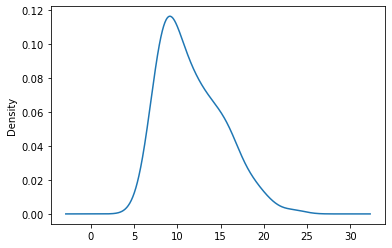

In [15]:
#checking distribution for salesmd
store.salesmd.plot.density()

<AxesSubplot:ylabel='Frequency'>

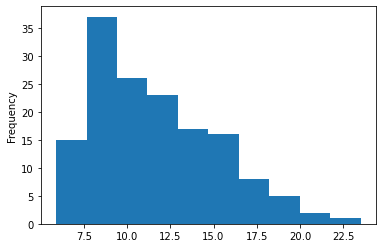

In [16]:
#using histogram to see abnormally high values
store.salesmd.plot.hist()

<AxesSubplot:xlabel='salesmd'>

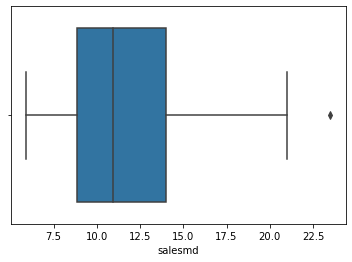

In [17]:
#checking outliers using boxplot
sb.boxplot(store.salesmd)

<AxesSubplot:ylabel='Density'>

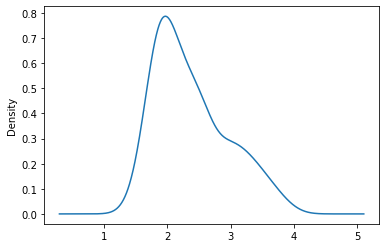

In [18]:
#checking distribution for wagesmd
store.wagesmd.plot.density()

<AxesSubplot:ylabel='Frequency'>

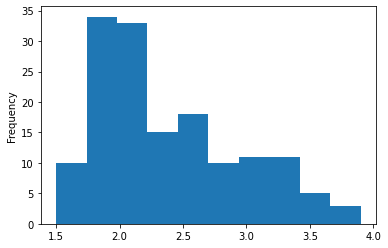

In [19]:
#using histogram to see abnormally high values
store.wagesmd.plot.hist()

<AxesSubplot:xlabel='wagesmd'>

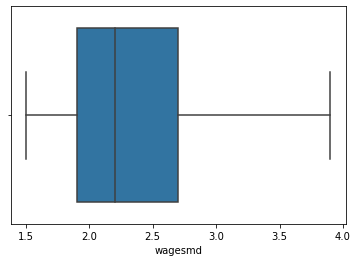

In [20]:
#checking outliers using boxplot
sb.boxplot(store.wagesmd)

<AxesSubplot:ylabel='Density'>

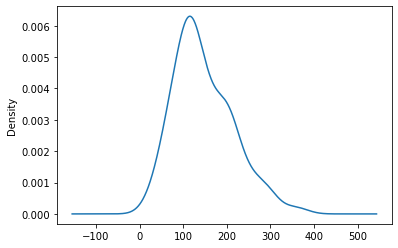

In [21]:
#checking distribution for advkd
store.advkd.plot.density()

<AxesSubplot:ylabel='Frequency'>

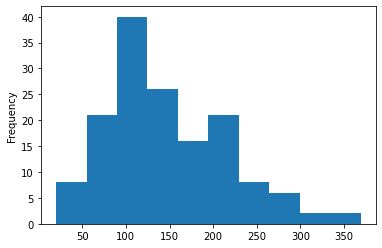

In [22]:
#using histogram to see abnormally high values
store.advkd.plot.hist()

<AxesSubplot:xlabel='advkd'>

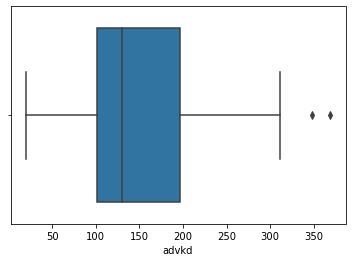

In [23]:
#checking outliers using boxplot
sb.boxplot(store.advkd)

<AxesSubplot:ylabel='Density'>

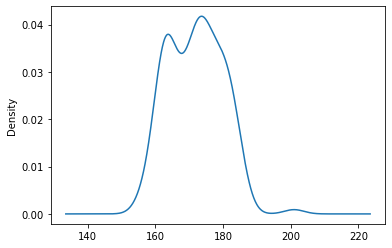

In [24]:
#checking distribution for bkxiii
store.bkxiii.plot.density()

<AxesSubplot:ylabel='Frequency'>

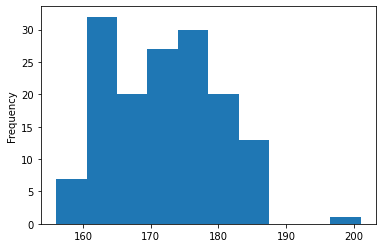

In [25]:
#using histogram to see abnormally high values
store.bkxiii.plot.hist()

<AxesSubplot:xlabel='bkxiii'>

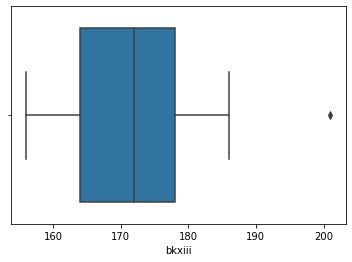

In [26]:
#checking outliers using boxplot
sb.boxplot(store.bkxiii)

<AxesSubplot:ylabel='Density'>

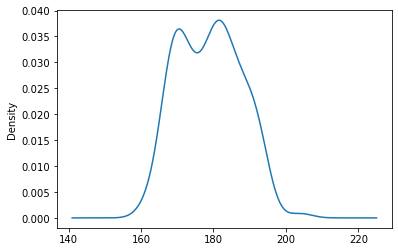

In [27]:
#checking distribution for bkxiv
store.bkxiv.plot.density()

<AxesSubplot:ylabel='Frequency'>

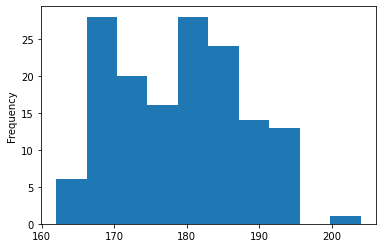

In [28]:
#using histogram to see abnormally high values
store.bkxiv.plot.hist()

<AxesSubplot:xlabel='bkxiv'>

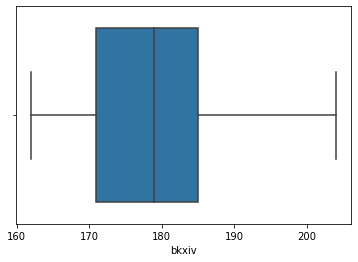

In [29]:
#checking outliers using boxplot
sb.boxplot(store.bkxiv)

<AxesSubplot:ylabel='Density'>

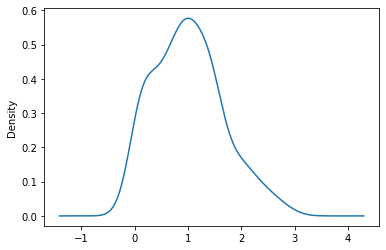

In [30]:
#checking distribution for GrossProfit
store.GrossProfit.plot.density()

<AxesSubplot:ylabel='Frequency'>

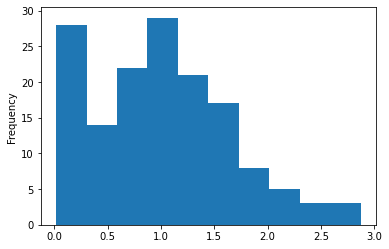

In [31]:
#using histogram to see abnormally high values
store.GrossProfit.plot.hist()

<AxesSubplot:xlabel='GrossProfit'>

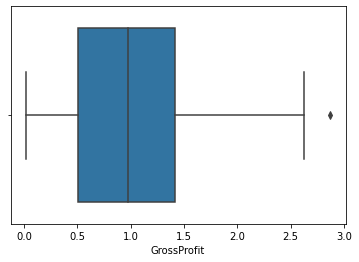

In [32]:
#checking outliers using boxplot
sb.boxplot(store.GrossProfit)

<AxesSubplot:ylabel='Density'>

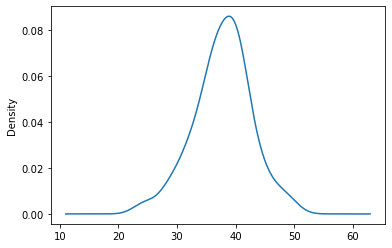

In [33]:
#checking distribution for Union%
store['Union%'].plot.density()

<AxesSubplot:ylabel='Frequency'>

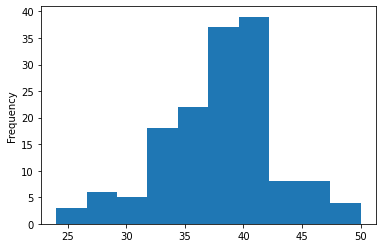

In [34]:
#using histogram to see abnormally high values
store['Union%'].plot.hist()

<AxesSubplot:xlabel='Union%'>

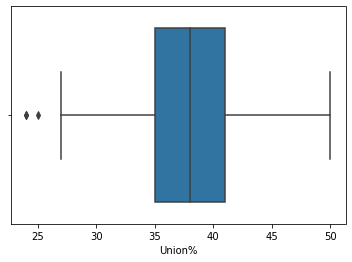

In [35]:
#checking outliers using boxplot
sb.boxplot(store['Union%'])

<AxesSubplot:ylabel='Density'>

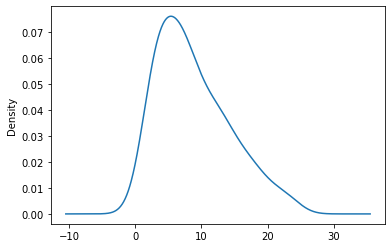

In [36]:
#checking distribution for Age (Yrs)
store['Age (Yrs)'].plot.density()

<AxesSubplot:ylabel='Frequency'>

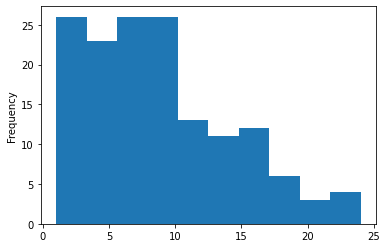

In [37]:
#using histogram to see abnormally high values
store['Age (Yrs)'].plot.hist()

<AxesSubplot:xlabel='Age (Yrs)'>

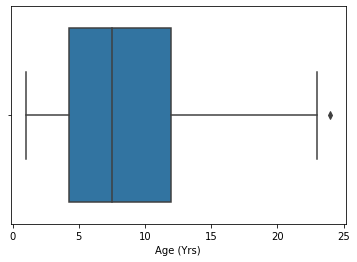

In [38]:
#checking outliers using boxplot
sb.boxplot(store['Age (Yrs)'])

<AxesSubplot:ylabel='Density'>

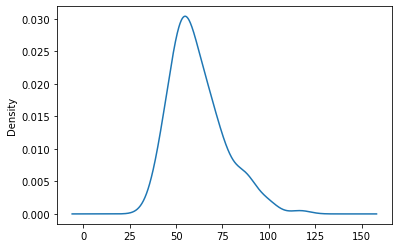

In [39]:
#checking distribution No. Staff
store['No. Staff'].plot.density()

<AxesSubplot:ylabel='Frequency'>

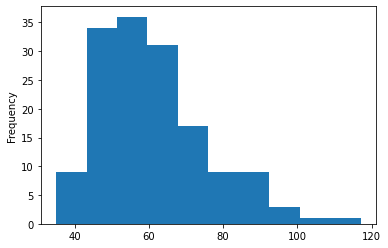

In [40]:
#using histogram to see abnormally high values
store['No. Staff'].plot.hist()

<AxesSubplot:xlabel='No. Staff'>

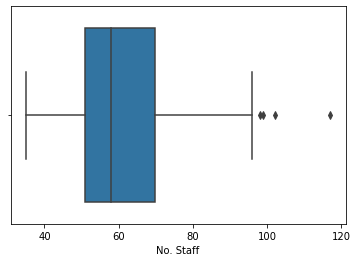

In [41]:
#checking outliers using boxplot
sb.boxplot(store['No. Staff'])

<AxesSubplot:ylabel='Density'>

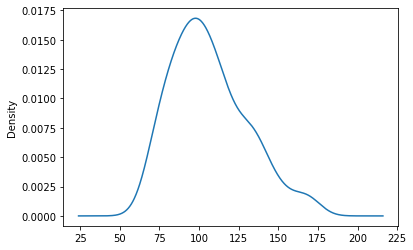

In [42]:
#checking distribution for 
store['HrsTrading'].plot.density()

<AxesSubplot:ylabel='Frequency'>

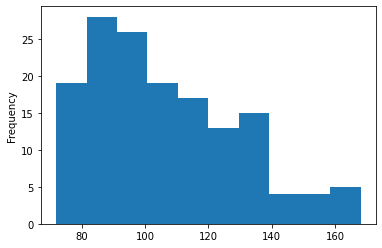

In [43]:
#using histogram to see abnormally high values
store['HrsTrading'].plot.hist()

<AxesSubplot:xlabel='HrsTrading'>

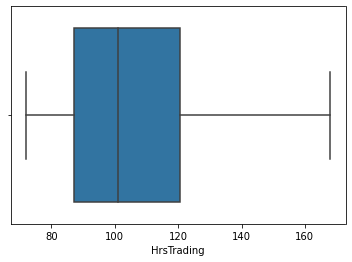

In [44]:
#checking outliers using boxplot
sb.boxplot(store['HrsTrading'])

<AxesSubplot:ylabel='Density'>

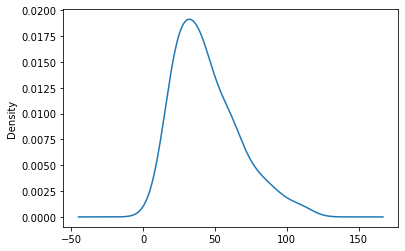

In [45]:
#checking distribution for Car Spaces
store['Car Spaces'].plot.density()

<AxesSubplot:ylabel='Frequency'>

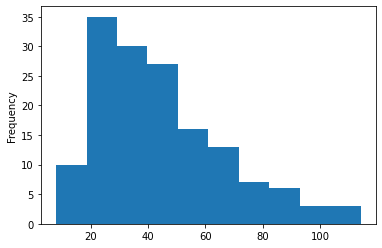

In [46]:
#using histogram to see abnormally high values
store['Car Spaces'].plot.hist()

<AxesSubplot:xlabel='Car Spaces'>

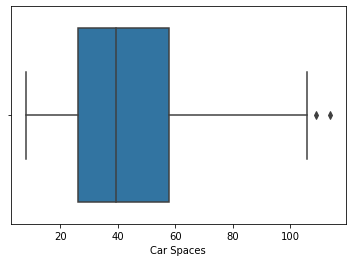

In [47]:
#checking outliers using boxplot
sb.boxplot(store['Car Spaces'])

<AxesSubplot:ylabel='Density'>

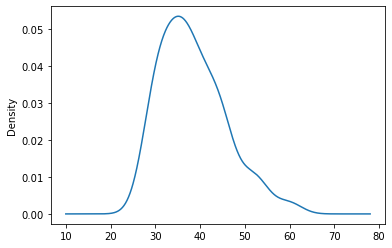

In [48]:
#checking distribution for Mng-Age
store['Mng-Age'].plot.density()

<AxesSubplot:ylabel='Frequency'>

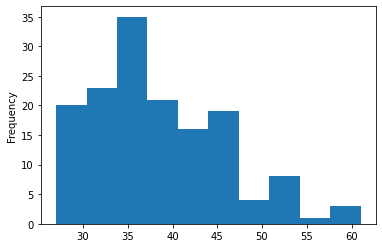

In [49]:
#using histogram to see abnormally high values
store['Mng-Age'].plot.hist()

<AxesSubplot:xlabel='Mng-Age'>

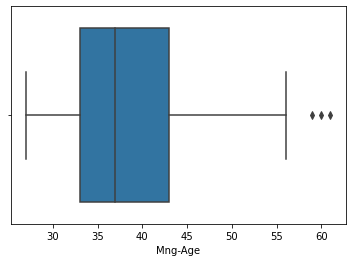

In [50]:
#checking outliers using boxplot
sb.boxplot(store['Mng-Age'])

<AxesSubplot:ylabel='Density'>

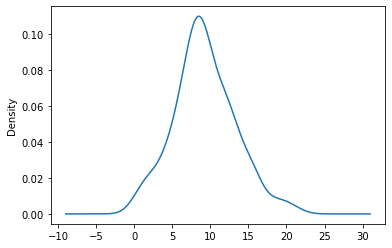

In [51]:
#checking distribution for Mng-Exp'
store['Mng-Exp'].plot.density()

<AxesSubplot:ylabel='Frequency'>

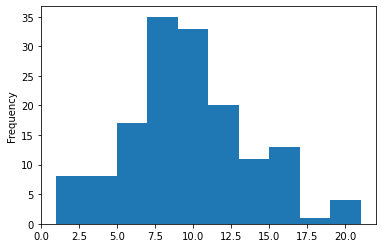

In [52]:
#using histogram to see abnormally high values
store['Mng-Exp'].plot.hist()

<AxesSubplot:xlabel='Mng-Exp'>

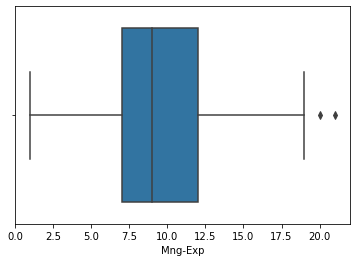

In [53]:
#checking outliers using boxplot
sb.boxplot(store['Mng-Exp'])

<AxesSubplot:ylabel='Density'>

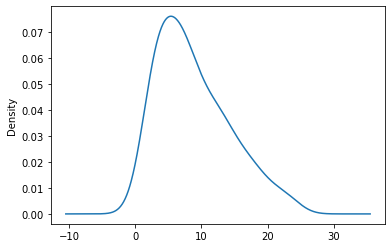

In [54]:
#checking distribution for Age (Yrs)
store['Age (Yrs)'].plot.density()

<AxesSubplot:ylabel='Frequency'>

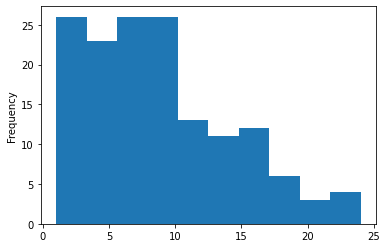

In [55]:
#using histogram to see abnormally high values
store['Age (Yrs)'].plot.hist()

<AxesSubplot:xlabel='Age (Yrs)'>

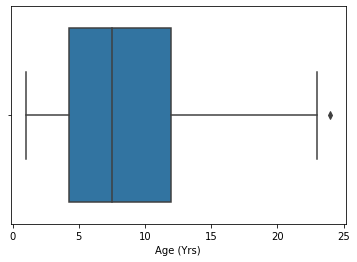

In [56]:
#checking outliers using boxplot
sb.boxplot(store['Age (Yrs)'])

**Step 3:Exploratory data analysis**

In this step, we are going to explore the dataset. Perform hypothesis tests,bivariate analysis and check for correlation between variables.  


In [57]:
#summary statistics
store.describe().round(2)

,Store No.,salesmd,wagesmd,No. Staff,Loc'n (Num),State (Num),Age (Yrs),GrossProfit,advkd,Competitors,...,Sundays (Num),Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),bkxiii,bkxiv
count,150.00,150.00,150.00,150.00,150.00,150.00,150.00,150.00,150.00,150.00,...,150.00,150.00,150.00,150.00,150.00,150.00,150.00,150.00,150.00,150.00
mean,75.50,11.66,2.38,61.49,1.91,3.03,8.85,1.01,147.27,2.51,...,0.62,0.17,38.42,9.25,2.81,37.79,44.19,0.30,171.81,178.85
std,43.45,3.57,0.57,14.61,0.77,1.89,5.44,0.65,67.99,1.74,...,0.49,0.37,7.34,3.99,1.18,4.90,22.16,0.46,8.01,8.64
min,1.00,5.90,1.50,35.00,1.00,1.00,1.00,0.02,20.00,0.00,...,0.00,0.00,27.00,1.00,1.00,24.00,8.00,0.00,156.00,162.00
25%,38.25,8.83,1.90,51.00,1.00,1.00,4.25,0.51,101.00,1.00,...,0.00,0.00,33.00,7.00,2.00,35.00,26.00,0.00,164.00,171.00
50%,75.50,10.95,2.20,58.00,2.00,3.00,7.50,0.98,130.50,2.00,...,1.00,0.00,37.00,9.00,3.00,38.00,39.50,0.00,172.00,179.00
75%,112.75,14.00,2.70,69.75,2.75,4.00,12.00,1.42,196.75,4.00,...,1.00,0.00,43.00,12.00,3.00,41.00,58.00,1.00,178.00,185.00
max,150.00,23.50,3.90,117.00,3.00,8.00,24.00,2.87,369.00,7.00,...,1.00,1.00,61.00,21.00,6.00,50.00,114.00,1.00,201.00,204.00


In [58]:
#seeing correlation of numerical variables
num_vars=['salesmd','wagesmd','advkd','GrossProfit','bkxiv','bkxiii','Union%','No. Staff','HrsTrading','Car Spaces','Mng-Age','Mng-Exp','Age (Yrs)']
cordata =store[num_vars].corr()
cordata.round(2)

,salesmd,wagesmd,advkd,GrossProfit,bkxiv,bkxiii,Union%,No. Staff,HrsTrading,Car Spaces,Mng-Age,Mng-Exp,Age (Yrs)
salesmd,1.00,0.81,0.84,0.05,0.45,0.45,0.01,0.74,-0.09,0.57,-0.22,0.38,-0.12
wagesmd,0.81,1.00,0.80,0.05,0.21,0.21,-0.03,0.92,-0.09,0.70,-0.07,0.12,-0.06
advkd,0.84,0.80,1.00,0.03,-0.02,-0.01,0.06,0.74,-0.05,0.54,-0.05,0.23,-0.01
GrossProfit,0.05,0.05,0.03,1.00,0.16,0.18,0.03,-0.05,-0.69,0.01,-0.07,-0.18,-0.04
bkxiv,0.45,0.21,-0.02,0.16,1.00,0.99,-0.12,0.14,-0.33,0.18,-0.33,0.27,-0.25
bkxiii,0.45,0.21,-0.01,0.18,0.99,1.00,-0.11,0.13,-0.35,0.16,-0.32,0.26,-0.25
Union%,0.01,-0.03,0.06,0.03,-0.12,-0.11,1.00,-0.02,-0.04,-0.03,0.02,0.04,0.89
No. Staff,0.74,0.92,0.74,-0.05,0.14,0.13,-0.02,1.00,0.03,0.76,-0.00,0.10,-0.03
HrsTrading,-0.09,-0.09,-0.05,-0.69,-0.33,-0.35,-0.04,0.03,1.00,-0.02,0.16,0.24,0.02
Car Spaces,0.57,0.70,0.54,0.01,0.18,0.16,-0.03,0.76,-0.02,1.00,-0.03,0.06,-0.05


<AxesSubplot:>

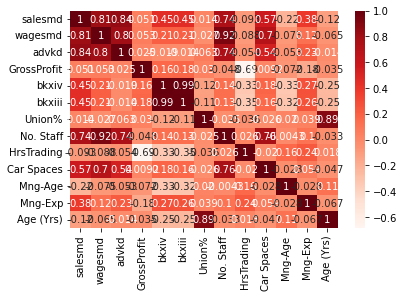

In [59]:
#heatmap of correlation
sb.heatmap(cordata, annot=True, cmap="Reds")

<AxesSubplot:xlabel='Location', ylabel='salesmd'>

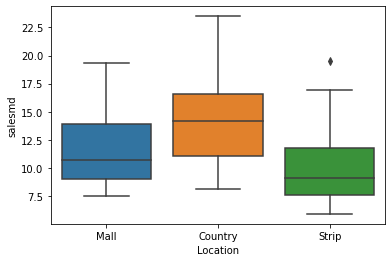

In [60]:
#box plot for salesmd vs Location

sb.boxplot("Location", "salesmd", data=store)


In [61]:
#checking if sales differs according to the Location
mod = ols("salesmd ~ Location", data=store).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
Location,2.0,410.866907,205.433454,20.278824,1.668853e-08
Residual,147.0,1489.175026,10.130442,NaN,NaN


<AxesSubplot:xlabel='State', ylabel='wagesmd'>

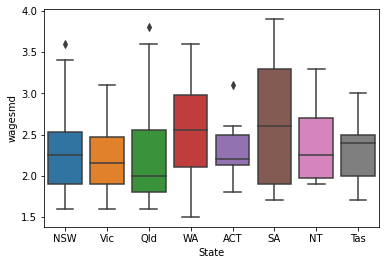

In [62]:
#box plot for wagesmd vs State

sb.boxplot("State", "wagesmd", data=store)

In [63]:
#checking if wages differs according to the State
mod = ols("wagesmd ~ State", data=store).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
State,7.0,3.592253,0.513179,1.639178,0.129052
Residual,142.0,44.456080,0.313071,NaN,NaN


<AxesSubplot:xlabel='State', ylabel='advkd'>

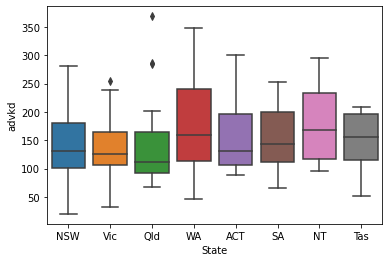

In [64]:
#box plot for adv  budget vs State

sb.boxplot("State", "advkd", data=store)

In [65]:
#checking if adv budget differs according to the State
mod = ols("advkd ~ State", data=store).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
State,7.0,29613.434621,4230.490660,0.911237,0.499705
Residual,142.0,659246.358712,4642.579991,NaN,NaN


<AxesSubplot:xlabel='State', ylabel='salesmd'>

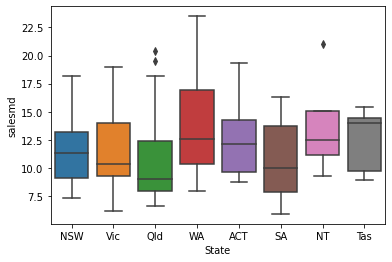

In [66]:
#box plot for salesmd vs State

sb.boxplot("State", "salesmd", data=store)

In [67]:
#checking if sales differs according to the State
mod = ols("salesmd ~ State", data=store).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
State,7.0,129.650789,18.521541,1.485581,0.176947
Residual,142.0,1770.391145,12.467543,NaN,NaN


<AxesSubplot:xlabel='State', ylabel='GrossProfit'>

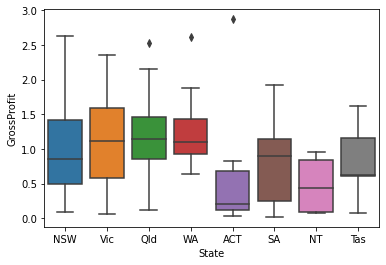

In [68]:
#box plot for GrossProfit vs State

sb.boxplot("State", "GrossProfit", data=store)

In [69]:
#checking if GrossProfit  differs according to the State
mod = ols("GrossProfit  ~ State", data=store).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
State,7.0,4.354289,0.622041,1.528566,0.162185
Residual,142.0,57.786110,0.406944,NaN,NaN


<AxesSubplot:xlabel='State', ylabel='HrsTrading'>

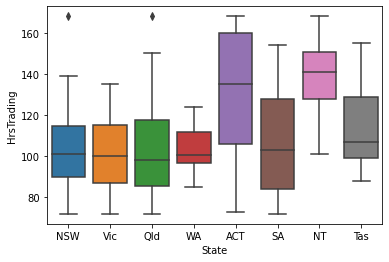

In [70]:
#box plot for HrsTrading vs State

sb.boxplot("State", "HrsTrading", data=store)

In [71]:
#checking if HrsTrading  differs according to the State
mod = ols("HrsTrading  ~ State", data=store).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
State,7.0,8552.116810,1221.730973,2.313941,0.028983
Residual,142.0,74974.156524,527.987018,NaN,NaN


In [72]:
#Gender/location wise Profit
store.pivot_table(values='GrossProfit',
                 index='Mng-Sex (Num)',
                 columns='Location', fill_value=0, aggfunc='mean')

Location,Country,Mall,Strip
Mng-Sex (Num),,,
0,1.006581,1.118640,1.040545
1,0.729000,0.840636,0.603286


In [73]:
#Gender/State wise sales
store.pivot_table(values='salesmd',
                 index='Mng-Sex (Num)',
                 columns='State', fill_value=0, aggfunc='mean')

State,ACT,NSW,NT,Qld,SA,Tas,Vic,WA
Mng-Sex (Num),,,,,,,,
0,12.683333,11.564706,13.8,11.309524,10.283333,12.0,11.996154,14.016667
1,0.000000,11.433333,0.0,9.450000,11.975000,14.4,9.175000,12.350000


In [74]:
#Gender wage gap state wise
store.pivot_table(values='wagesmd',
                 index='Mng-Sex (Num)',
                 columns='State', fill_value=0, aggfunc='mean')

State,ACT,NSW,NT,Qld,SA,Tas,Vic,WA
Mng-Sex (Num),,,,,,,,
0,2.333333,2.314706,2.425,2.342857,2.622222,2.15,2.280769,2.658333
1,0.000000,2.283333,0.000,2.016667,2.850000,3.00,2.025000,2.400000


In [75]:
#Seeing  number of managers who are part of union state wise
store.pivot_table(values='Union%',
                 index='Mng-Sex (Num)',
                 columns='State', fill_value=0, aggfunc='mean')

State,ACT,NSW,NT,Qld,SA,Tas,Vic,WA
Mng-Sex (Num),,,,,,,,
0,37.333333,38.823529,39,38.428571,36.833333,34,38.038462,39.333333
1,0.000000,38.333333,0,33.333333,34.750000,36,40.000000,34.000000


'blue is no and yellow is yes'

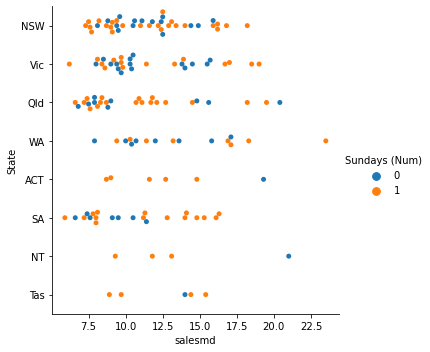

In [79]:
#Are sunday trading stores more revenue generating across states?
sb.catplot(data=store, x="salesmd", y='State', hue="Sundays (Num)", kind="swarm")
plt.rcParams['figure.figsize'] = [50, 10]

"blue is no and yellow is yes"

'blue is no and yellow is yes'

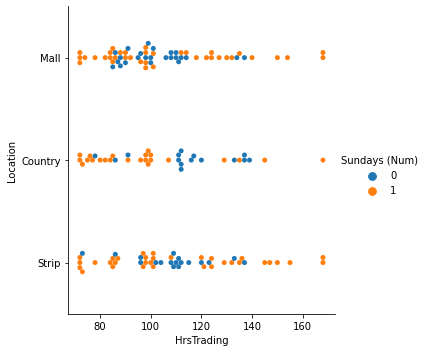

In [77]:
#Do sunday trading stores work more hours across Location?
sb.catplot(data=store, x="HrsTrading", y='Location', hue="Sundays (Num)", kind="swarm")
plt.rcParams['figure.figsize'] = [50, 10]

"blue is no and yellow is yes"

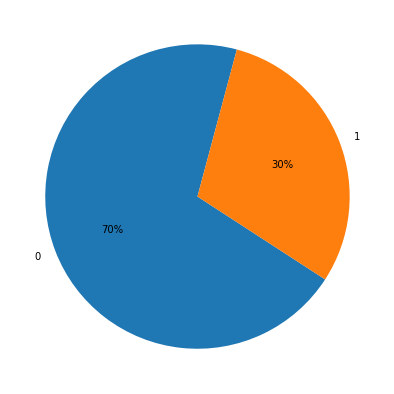

In [100]:
#What percentage stores are home delivery?
delivery=store['HomeDel (Num)'].unique()
numbers=store['HomeDel (Num)'].value_counts()

#home delivery percentage
plt.pie(numbers, labels = delivery, startangle = 75,autopct='%1.0f%%')
plt.show()

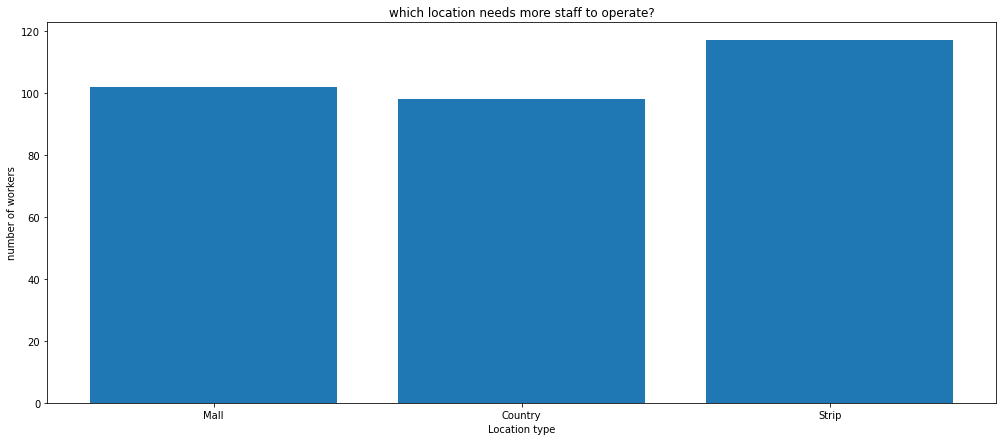

In [101]:
#which store type has most staff?
staff=store['No. Staff']
location=store['Location']

#plotting survivors per hospital number
plt.bar(location,staff)

plt.title('which location needs more staff to operate?')
plt.xlabel('Location type')
plt.ylabel('number of workers')
plt.rcParams['figure.figsize'] = [17, 7]
plt.show()

([<matplotlib.patches.Wedge at 0x1dc25e139a0>,
 [Text(-1.2636617362660532, 0.3815219735442036, 'Mall'),
  Text(0.6115507765804128, -1.169788719241169, 'Country'),
  Text(0.9431039278918859, 0.9235556188962831, 'Strip')],
 [Text(-0.6892700379633017, 0.20810289466047466, '41%'),
  Text(0.3335731508620433, -0.6380665741315467, '34%'),
  Text(0.514420324304665, 0.5037576103070635, '25%')])

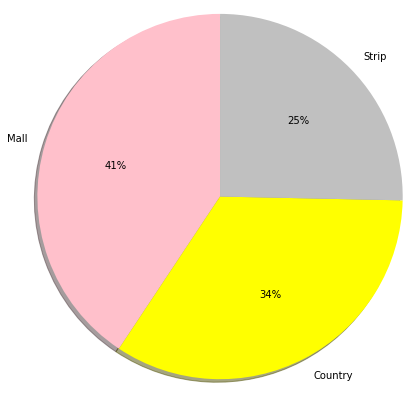

In [98]:
#which Location has more stores?

loc=store['Location'].unique()
number=store['Location'].value_counts()


# color for each label
colors = ['pink', 'yellow', 'silver']
  
# plotting the pie chart
plt.pie(number, labels = 
loc, colors=colors, 
        startangle=90, shadow = True,
        radius = 1.2, autopct = '%1.0f%%')

In [106]:
#top 3 state by wage spend
top3state=store.sort_values('wagesmd')['State'].head(3)
top3state

27     WA
82    NSW
25    Vic
Name: State, dtype: object

**Observations**

Sales displays positive high correlation with wages ad budgetnumber of staff and moderately high with number of car spaces and manager experience

Sales display mildly negative correlation with age of the store and manager age

Country location has high sales

SA state has high amount of wages spend and highest sales

WA state has high amount of AD spend

Profit is almost the same everywhere

ACT state has more working hours for employees

WA state has the highest wages 

Male managers are more profitable and generate more revenue

There is no instance of gender pay gap

Most of the stores do home delivery

Most of the stores are located in Mall but Strip has the most workers

Most of the stores trade on sunday and there is no difference of revenue/working hours between sunday operating/non operating stores across states/location types


In [112]:
#dropping useless columns
store=store.drop(['Location','State'],axis=1)
store

,Store No.,salesmd,wagesmd,No. Staff,Loc'n (Num),State (Num),Age (Yrs),GrossProfit,advkd,Competitors,...,Sundays (Num),Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),bkxiii,bkxiv
0,1,12.5,2.3,60,2,1,10,0.712,171,3,...,0,0,33,12,2,38,46,0,171,178
1,2,14.5,2.7,69,2,2,8,0.091,213,5,...,0,0,33,16,1,38,73,0,168,178
2,3,19.0,3.1,79,3,2,7,1.075,255,2,...,1,0,30,9,2,39,64,0,180,188
3,4,18.2,2.6,66,2,3,7,1.372,287,1,...,1,0,29,9,2,38,66,1,173,180
4,5,7.6,2.0,51,1,3,15,2.148,112,0,...,1,0,36,4,3,40,29,0,166,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,14.1,3.3,88,1,4,5,0.504,253,4,...,1,1,42,9,3,35,63,0,163,172
146,147,8.1,1.7,58,3,1,19,0.447,20,4,...,0,0,43,12,3,42,35,0,178,186
147,148,13.6,2.9,66,1,5,17,2.620,103,2,...,0,0,39,8,3,45,48,0,166,172
148,149,10.0,2.0,55,2,5,8,1.168,120,3,...,0,0,52,13,3,40,34,0,174,182


In [113]:
#train test split
df_train, df_test = train_test_split(store, train_size = 0.7, random_state = 100)

In [114]:
#separation of X and Y 
y_train = df_train.pop("salesmd")
X_train = df_train

y_test = df_test.pop("salesmd")
X_test = df_test


In [115]:
#initializing model and fitting 
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [116]:
#Reporting R2 

y_train_pred= lr.predict(X_train)
r2_score(y_train, y_train_pred).round(2)


0.97

In [117]:
#prediction on test set
y_test_pred= lr.predict(X_test)
r2_score(y_test, y_test_pred).round(2)

0.96

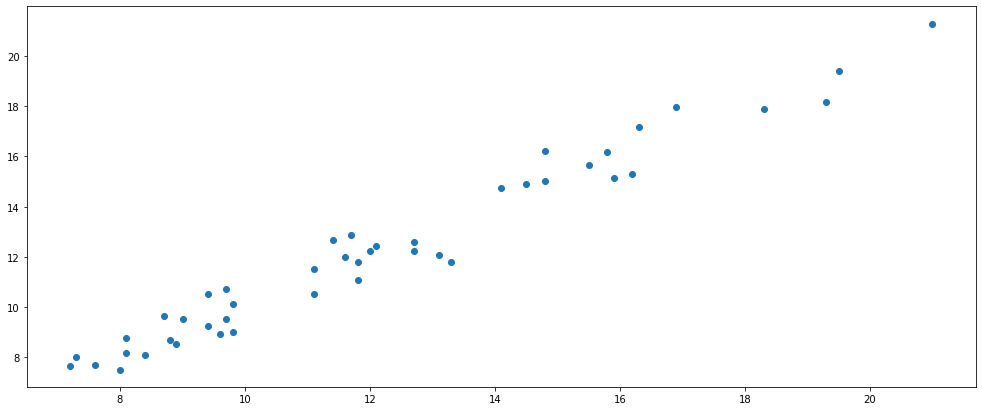

In [118]:
# Actual v predictions scatter
plt.scatter(y_test,y_test_pred)

<AxesSubplot:xlabel='salesmd', ylabel='Density'>

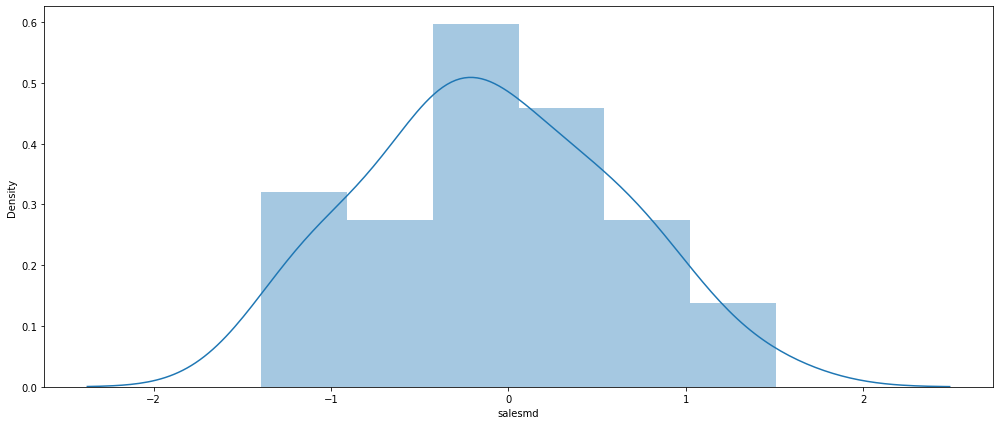

In [119]:
# Histogram of the distribution of residuals
sb.distplot((y_test - y_test_pred))

In [120]:
#coefficients 
cdf = pd.DataFrame(data = lr.coef_, index = X_train.columns, columns = ['Coefficients'])
cdf

,Coefficients
Store No.,0.002420
wagesmd,0.739065
No. Staff,0.004393
Loc'n (Num),1.773015
State (Num),-0.013535
Age (Yrs),0.022215
GrossProfit,0.722451
advkd,0.040306
Competitors,0.293384
HrsTrading,-0.002322


In [121]:
#seeing predicted values
y_test_pred[0:10].round()

array([11., 18., 11.,  9., 15., 13.,  8., 15.,  9., 16.])

In [123]:
mse = mean_squared_error(y_test,y_test_pred)
print('The mean square error of sale and predicted value is: ', mse)

The mean square error of sale and predicted value is:  0.485474566832908


In [135]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  


In [126]:
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [127]:
#regressor predict
y_pred = regressor.predict(X_test)

In [128]:
#seeing R2 score
r2_score(y_test, y_test_pred).round(2)

0.96

In [129]:
#prediction on test set
y_test_pred= regressor.predict(X_test)
r2_score(y_test, y_test_pred).round(2)

0.88

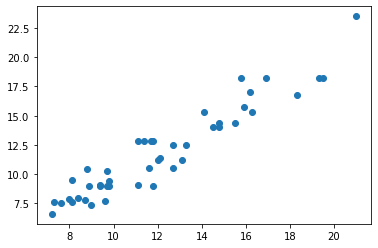

In [130]:
# Actual v predictions scatter
plt.scatter(y_test,y_test_pred)

<AxesSubplot:xlabel='salesmd', ylabel='Density'>

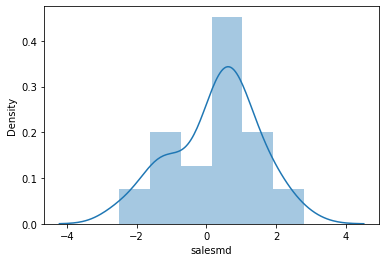

In [131]:
# Histogram of the distribution of residuals
sb.distplot((y_test - y_test_pred))

In [132]:
#coefficients 
cdf = pd.DataFrame(data = lr.coef_, index = X_train.columns, columns = ['Coefficients'])
cdf

,Coefficients
Store No.,0.002420
wagesmd,0.739065
No. Staff,0.004393
Loc'n (Num),1.773015
State (Num),-0.013535
Age (Yrs),0.022215
GrossProfit,0.722451
advkd,0.040306
Competitors,0.293384
HrsTrading,-0.002322


In [133]:
#seeing predicted values
y_test_pred[0:10].round()

array([ 9., 18.,  9.,  9., 17., 13.,  8., 14.,  9., 14.])

In [134]:
mse = mean_squared_error(y_test,y_test_pred)
print('The mean square error of sale and predicted value is: ', mse)

The mean square error of sale and predicted value is:  1.5308888888888892


**Conclusion**

The MLR model is 97% accurate compared to 88% accuratcy of Decision Tree Regressor. The MLR model has a lower MSE compared to Decision Tree and hence it should be used.